# Thermal Chemical Equilibrium for Two Species System

Hajime Kawahara 6/30 (2025)

## Analytic Solutions

First, consider the simplest two-component gas made of atomic and molecular hydrogen,

$\mathrm{2 H \leftrightarrow H_2}$

and examine its composition at thermochemical equilibrium.
There are two species, H and H$_2$ ($N_s = 2$), and a single element, H ($N_e = 1$).

With one mole of elemental hydrogen, the conservation law is

$n_{\mathrm{H}} + 2 n_{\mathrm{H_2}} = n_{\text{element,H}} = 1 \mathrm{mol}$

When pressure $P$ and temperature $T$ are specified, the distribution of the element H between H and H$_2$ is obtained by minimizing the Gibbs free energy,

$\mathbf{n}^\ast = \mathrm{argmin}_{\mathbf{n}} G(T,P,\mathbf{n})$
subject to 
$n_{\mathrm{H}} + 2 n_{\mathrm{H_2}} = 1$ 
and 
$n_{\mathrm{H}}, n_{\mathrm{H_2}} \ge 0$
, 

where
$G(T,P,\mathbf{n}) = n_{\mathrm{H}}\mu_{\mathrm{H}} + n_{\mathrm{H_2}}\mu_{\mathrm{H_2}}$

Using standard‐state chemical potentials,

$\mu_{\mathrm{H}} = \mu_{\mathrm{H}}^{\circ}(T) + RT \ln \frac{P_{\mathrm{H}}}{P_{\mathrm{ref}}} = \mu_{\mathrm{H}}^{\circ}(T) + RT \ln \frac{n_{\mathrm{H}} P}{(n_{\mathrm{H}} + n_{\mathrm{H_2}})P_{\mathrm{ref}}}$

$\mu_{\mathrm{H_2}} = \mu_{\mathrm{H_2}}^{\circ}(T) + RT \ln \frac{P_{\mathrm{H_2}}}{P_{\mathrm{ref}}} = \mu_{\mathrm{H_2}}^{\circ}(T) + RT \ln \frac{n_{\mathrm{H_2}} P}{(n_{\mathrm{H}} + n_{\mathrm{H_2}})P_{\mathrm{ref}}}$

Introducing the Lagrange multiplier $\lambda$, define

$\mathcal{L}(T,P,\mathbf{x}) = G(T,P,\mathbf{n}) + \lambda ( n_{\mathrm{H}} + 2 n_{\mathrm{H_2}} - 1)$
, 

with 
$\mathbf{x} = (n_{\mathrm{H}}, n_{\mathrm{H_2}}, \lambda)^\top$
. 
Setting the gradient 

$\partial\mathcal{L}/\partial\mathbf{x}=\mathbf{0}$ 

yields

$\log \left( \frac{n_{\mathrm{H}}^{,2}}{n_{\mathrm{H_2}}(n_{\mathrm{H}} + n_{\mathrm{H_2}})} \frac{P}{P_{\mathrm{ref}}} \right) = -\frac{2\mu_{\mathrm{H}}^{\circ} - \mu_{\mathrm{H_2}}^{\circ}}{RT}$
.

Eliminating 
$n_{\mathrm{H_2}}$ 
with the conservation law gives

$\frac{1 - n_{\mathrm{H}}^{,2}}{4 n_{\mathrm{H}}^{,2}} = k, \quad k \equiv \frac{P}{P_{\mathrm{ref}}}\exp \left( -\frac{\mu_{\mathrm{H_2}}^{\circ} - 2\mu_{\mathrm{H}}^{\circ}}{RT} \right)$
.

Because 
$n_{\mathrm{H}} \ge 0$
,

$n_{\mathrm{H}} = \frac{1}{\sqrt{4k + 1}}$

and 

$n_{\mathrm{H_2}} = \frac{1}{2} \left(1 - \frac{1}{\sqrt{4k + 1}}\right)$
.

The volume–mixing ratios are then

$\mathrm{VMR}(\mathrm{H}) = \frac{1}{2} \left( \sqrt{k^{2}+4k} - k \right)$

and

$\mathrm{VMR}(\mathrm{H_2}) = \frac{1}{2}  \left( 2 + k - \sqrt{k^{2}+4k} \right)$
.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

from exogibbs.utils.constants import R_gas_constant_si
from exogibbs.io.load_data import load_molname, load_JANAF_molecules
from exogibbs.equilibrium.gibbs import interpolate_chemical_potential_one

In [ ]:
df_molname = load_molname()
path_JANAF_data = "/home/kawahara/thermochemical_equilibrium/Equilibrium/JANAF"
gibbs_matrices = load_JANAF_molecules(df_molname, path_JANAF_data)

T_h_table = gibbs_matrices["H1"]['T(K)'].to_numpy()
mu_h_table = gibbs_matrices["H1"]['delta-f G'].to_numpy()
T_h2_table = gibbs_matrices["H2"]['T(K)'].to_numpy()
mu_h2_table = gibbs_matrices["H2"]['delta-f G'].to_numpy()


# If you want to use the FEF data for checmical potential, uncomment the following lines:
if False:
    index_h = np.where(np.isclose(T_h_table, 298.15))[0][0]
    index_h2 = np.where(np.isclose(T_h2_table, 298.15))[0][0]
    T_h_table[index_h], T_h2_table[index_h2]
    fef_h_table = gibbs_matrices["H1"]['-[G-H(Tr)]/T'].to_numpy()
    fef_h2_table = gibbs_matrices["H2"]['-[G-H(Tr)]/T'].to_numpy()

    dHf_h_298 = gibbs_matrices["H1"]['delta-f H'].to_numpy()[index_h]
    dHf_h2_298 = gibbs_matrices["H2"]['delta-f H'].to_numpy()[index_h2]

    mu_h_table = -T_h_table * fef_h_table * 1.e-3  + dHf_h_298
    mu_h2_table = -T_h2_table * fef_h2_table * 1.e-3  + dHf_h2_298
####

def mu_h(T):
    return interpolate_chemical_potential_one(T, T_h_table, mu_h_table, order=2)
def mu_h2(T):
    return interpolate_chemical_potential_one(T, T_h2_table, mu_h2_table, order=2)

def compute_k(P, T, Pref=1.0):
    delta_mu = mu_h2(T) - 2.0*mu_h(T)
    return np.exp(- delta_mu / R_gas_constant_si) * P/Pref     

Tarr = np.linspace(10.0, 6000.0, 300)
Parr = np.logspace(-8.0, 2.0, 300)


/home/kawahara/exogibbs/src/exogibbs/io/load_data.py:139: RuntimeWarning: Failed to load /home/kawahara/thermochemical_equilibrium/Equilibrium/JANAF/S8(g).txt: Error tokenizing data. C error: Expected 8 fields in line 17, saw 22

  warnings.warn(f"Failed to load {file_path}: {exc}", RuntimeWarning)
/tmp/ipykernel_576202/1744832009.py:21: RuntimeWarning: invalid value encountered in multiply
  mu_h_table = -T_h_table * fef_h_table * 1.e-3  + dHf_h_298
/tmp/ipykernel_576202/1744832009.py:22: RuntimeWarning: invalid value encountered in multiply
  mu_h2_table = -T_h2_table * fef_h2_table * 1.e-3  + dHf_h2_298


In [8]:
def nh(k):
    return 1.0 / np.sqrt(4.0*k + 1.0)


def nh2(k):
    return 0.5 * (1.0 - nh(k))


def ntotal(k):
    return nh(k) + nh2(k)


def vmr_h(k):
    return nh(k) / ntotal(k)


def vmr_h2(k):
    return nh2(k) / ntotal(k)

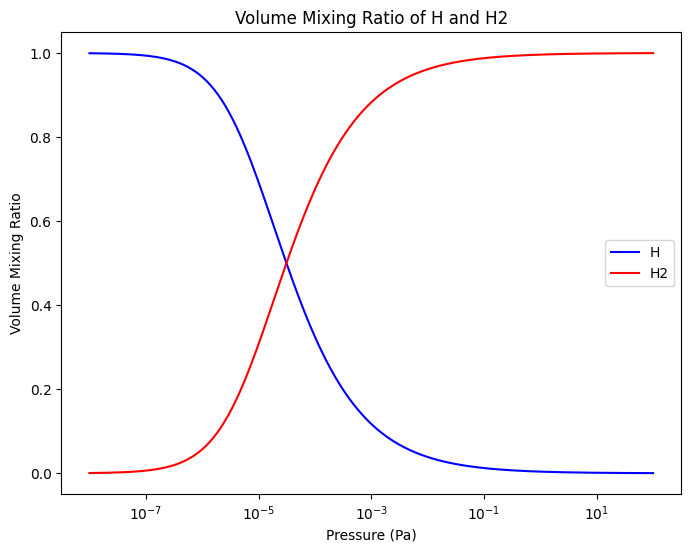

In [9]:
plt.figure(figsize=(8, 6))
plt.plot(Parr, vmr_h(compute_k(Parr,3000.0)), label='H', color='blue')
plt.plot(Parr, vmr_h2(compute_k(Parr,3000.0)), label='H2', color='red')
plt.xscale('log')
#plt.yscale('log')
plt.xlabel("Pressure (Pa)")
plt.ylabel('Volume Mixing Ratio')
plt.title('Volume Mixing Ratio of H and H2')
plt.legend()


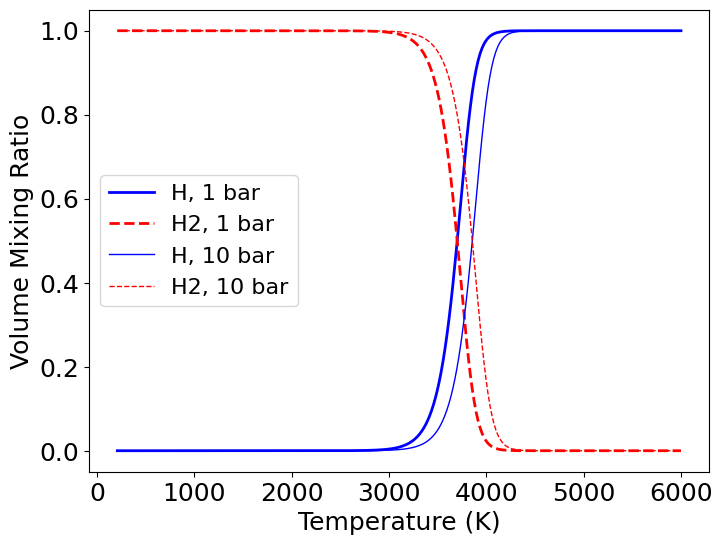

In [10]:
from tkinter import font


plt.figure(figsize=(8, 6))
plt.plot(Tarr, vmr_h(compute_k(1.0,Tarr)), label='H, 1 bar', color='blue', lw=2)
plt.plot(Tarr, vmr_h2(compute_k(1.0,Tarr)), label='H2, 1 bar', color='red', ls='--', lw=2)
plt.plot(Tarr, vmr_h(compute_k(10.0,Tarr)), label='H, 10 bar', color='blue', lw=1)
plt.plot(Tarr, vmr_h2(compute_k(10.0,Tarr)), label='H2, 10 bar', color='red', ls='--', lw=1)

#plt.xscale('log')
#plt.yscale('log')
#plt.gca().invert_xaxis()
plt.tick_params(labelsize=18)
plt.xlabel("Temperature (K)",fontsize=18)
plt.ylabel('Volume Mixing Ratio', fontsize=18)
plt.legend(fontsize=16, loc='center left')
plt.savefig("tce_two_species.png", dpi=300, bbox_inches='tight')


## Optimization (Newton)

$\mathcal{L}(T,P,\mathbf{x}) = G(T,P,\mathbf{n}) + \lambda ( n_{\mathrm{H}} + 2 n_{\mathrm{H_2}} - 1)$
, 

with 
$\mathbf{x} = (\log{n_{\mathrm{H}}}, \log{n_{\mathrm{H_2}}}, \lambda)^\top$
. 
Setting the gradient 

$\partial\mathcal{L}/\partial\mathbf{x}=\mathbf{0}$ 
